---
# Scooters in Austin Data Analysis
### Team Members: Erin Bentley, Jason Jones, Sana Khan, Sheetal Bongale
### UT Data Analysis & Visualization Bootcamp | Python Project 1 | January 2020
---

### *`"In 2018, people took 84 million trips on Shared Micromobility in the United States, more than double the number of trips taken in 2017." -NACTO`*

![Austin Scooter](resources/austin.png)

## Our Question: 
Do the most popular zip codes to start or end rides also have the most complaints?

### Hypothesis: 
While we thought that obviously the neighborhoods with the most rides would likely have the most complaints, we also thought that some neighborhoods complain about a higher percent of the scooters that enter their area than other neighborhoods do. 

We figured these would be neighborhoods that are not as popular start points, who see the scooters longer and thus are more likely to complain.

### Data Sources and API

* City of Austin 311 OpenData: https://data.austintexas.gov/City-Government/311-Unified-Data-Test-Site-2019/i26j-ai4z
    - API Endpoint: https://data.austintexas.gov/resource/i26j-ai4z.json
    
* Austin Shared Mobility API: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
    - API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
    
* Census tract to zipcode conversion: https://www.huduser.gov/portal/datasets/usps_crosswalk.html

To access the dataset host, install SODA API first:
    `pip install sodapy`

## Which hours of the day are most popular?

![trips_per_hour.png](notebooks/shared_mobility_data_analysis/Plots/trips_per_hour.png)

## What are the most popular days of the week?

![trips_per_week.png](notebooks/shared_mobility_data_analysis/Plots/trips_per_week.png)

## Are some months more popular than others?

![trips_per_month2.png](notebooks/shared_mobility_data_analysis/Plots/trips_per_month1.png)

## Total daily rides per hour for each day of the week?

![dailyrides_per_hour.png](notebooks/shared_mobility_data_analysis/Plots/dailyrides_per_hour.png)

## Complaints per Capita

![comp_per_capita.png](notebooks/shared_mobility_data_analysis/Plots/comp_per_capita.png)

## Complaints per Ride Endpoint

![comp_per_endpoint.png](notebooks/shared_mobility_data_analysis/Plots/comp_per_endpoint.png)

---
## Which census tracts have the most traffic?

![trips_per_censustract.png](notebooks/shared_mobility_data_analysis/Plots/trips_per_censustract.png)

## What are the most popular Census Tracts to start a ride?

![choropeth_tractstart.png](notebooks/shared_mobility_data_analysis/Plots/choropeth_tractstart.png)

![zoomedchoropeth_tractstart.png](notebooks/shared_mobility_data_analysis/Plots/zoomedchoropeth_tractstart.png)

## What the more popular Census Tracts to start a ride?

![choropeth_tractend.png](notebooks/shared_mobility_data_analysis/Plots/choropeth_tractend.png)

![zoomedchoropeth_tractend.png](notebooks/shared_mobility_data_analysis/Plots/zoomedchoropeth_tractend.png)

## Which Zipcodes have the most traffic? (Without per capita factor)

![trips_per_zipcode.png](notebooks/shared_mobility_data_analysis/Plots/trips_per_zipcode.png)

## What are the top 25 popular routes to start and end rides?

![popular_routes_top25.png](notebooks/shared_mobility_data_analysis/Plots/popular_routes_top25.png)

## What locations in Austin get the most complaints about shared mobility?

In [3]:
%load_ext lab_black
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import geopandas as gpd
import plotly.figure_factory as ff
import warnings

warnings.filterwarnings("ignore")
# Read the 311 data csv
csvpath = os.path.join("resources/311data.csv")
df = pd.read_csv(csvpath, index_col=0, low_memory=False)

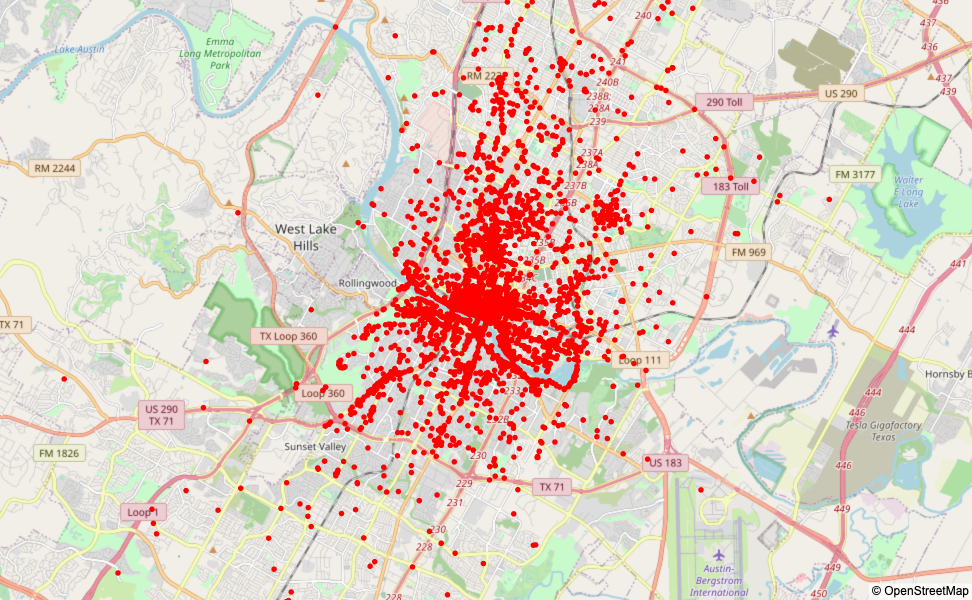

In [5]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat="SR Location Lat",
    lon="SR Location Long",
    hover_name="SR Method Received Desc",
    hover_data=["SR Location", "SR Type Desc"],
    color_discrete_sequence=["red"],
    zoom=11,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# ***Note: Plotly only works on Jupyter Notebook***

## Final Conclusions:

**Observations:**
1. 78701 Zipcode has the most number of starting and ending rides.
2. 78701 also had the most 311 complaints about shared mobility and dockless vehicles.
3. Saturday was the most popular day to ride a bicycle or a scooter. Also, Weekend spike indicates people like to ride scooters recreationally, or while they are enjoying activities that are outside of their normal weekly commute.
4. We can see there is a rush hour after work. We saw a peak in the number of rides at 5pm and also before & after 5pm. 
5. October, September and March have the most rides. This is when the weather is nicest in Austin, but also when the biggest Music festivals are. 

**Major limitations in our data:**
1. The Data set for the shared mobility data is limited by geography, we can’t get more specific than census tract. Hence we used Census tract shapefiles and geopandas.
2. 311 data was not clear about what the complaints were specifically about — you would have to manually find them on the 311. We also couldn’t see if it was business, resident, or passerby.
3. Joyriding, some rides are really short— some people just turn scooters on and don’t seem to take it anywhere. Our overall hypothesis and the census tract choropeth plots will change if we discard all the rows for rides with '0'meter distance.
4. We’d like to isolate the music festival dates out and see how much those specific dates impact the data.
5. 78701: Neighborhoods that are mostly commercial have a lot of people who work there, own businesses there, walk around there, but do not show up in the population. It is possible that business owners are more likely to complain because they are made less available to customers due to scooter issues. Nearly 100k people work in downtown Austin which is drastically different from the number of people who are living there. We saw rush hour right after work.

![Scooter meme](resources/scooters_meme.png)